In [1]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 
import time

The shape of the digits dataset:
(1797, 64)
[0]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 432x288 with 0 Axes>

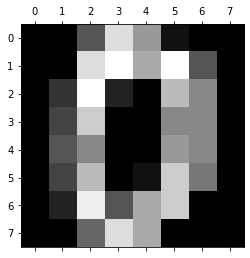

In [2]:
digits=load_digits()
X = digits.data
print("The shape of the digits dataset:") 
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()
y = digits.target
print(y[0:1])
print(X[0,:])

In [3]:
X_scale = StandardScaler()
X = X_scale.fit_transform(digits.data)

X[0,:] # Looking the new features after scaling

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [4]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
y_iris = iris.target
X_iris = iris.data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris,random_state=42)
X_scale = StandardScaler()
X_train_iris = X_scale.fit_transform(X_train_iris)
X_test_iris = X_scale.fit_transform(X_test_iris)

In [6]:
class SoftmaxLogisticRegression:
    def softmax(self, z):
        exp = np.exp(z)
        sum_exp = np.sum(np.exp(z), axis=1, keepdims=True)
        return exp / sum_exp
    
    def hypothesis(self, X):
        z = np.dot(X, self.w.T) + self.b
        h_x = self.softmax(z)
        return h_x

    def cross_entropy(self, y_one_hot, scores):
        return - (1 / self.n_samples) * np.sum(y_one_hot * np.log(scores))
    
    def one_hot(self, y):
        y_one_hot = np.zeros((len(y), self.n_classes))
        for i in range(len(y)):
            y_one_hot[i, y[i]] = 1
        return y_one_hot
    
    def predict(self, X):
        h_x = self.hypothesis(X)
        return np.argmax(h_x, axis=1)[:, np.newaxis]
    
    def train(self, X, y, num_iters=20, learning_rate=0.1, n_classes=3):
        self.n_samples, self.n_features = X.shape
        self.n_classes = n_classes
        
        self.w = np.random.rand(self.n_classes, self.n_features)
        self.b = np.zeros((1, self.n_classes))
        cross_entropy_list = []
        
        for i in range(num_iters):
            h_x = self.hypothesis(X)
            y_one_hot = self.one_hot(y)
            # if i == 1:
                # print(y_one_hot)

            one_cross_entropy = self.cross_entropy(y_one_hot, h_x)
            cross_entropy_list.append(self.cross_entropy(y_one_hot, h_x))

            dw = (1 / self.n_samples) * np.dot(X.T, (h_x - y_one_hot))
            db = (1 / self.n_samples) * np.sum(h_x - y_one_hot, axis=0)

            self.w = self.w - learning_rate * dw.T
            self.b = self.b - learning_rate * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, cross entropy: {np.round(one_cross_entropy, 4)}')

        return self.w, self.b, cross_entropy_list



## Naive Implement Softmax Logistic Regression- Iris Dataset



Iteration number: 0, cross entropy: 1.121
Iteration number: 100, cross entropy: 0.346
Iteration number: 200, cross entropy: 0.2749
Iteration number: 300, cross entropy: 0.2332
Iteration number: 400, cross entropy: 0.205
Iteration number: 500, cross entropy: 0.1845
Iteration number: 600, cross entropy: 0.169
Iteration number: 700, cross entropy: 0.1568


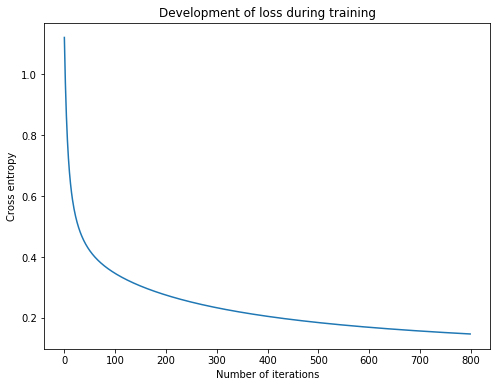

In [7]:
logistic_model_iris = SoftmaxLogisticRegression()
w_trained, b_trained, cross_entropy_list = logistic_model_iris.train(X_train_iris, y_train_iris, learning_rate=0.1, num_iters=800, n_classes=3)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), cross_entropy_list)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cross entropy")
plt.show()


In [8]:
n_test_samples, _ = X_test_iris.shape
y_predict_iris = logistic_model_iris.predict(X_test_iris)
# print(y_predict_iris)
# print(y_test_iris)
print(f"Accuracy is: {np.sum(y_predict_iris.T==y_test_iris)/n_test_samples}")

Accuracy is: 1.0


## Naive Implement Softmax Logistic Regression- Mnist Dataset



Iteration number: 0, cross entropy: 3.9376
Iteration number: 100, cross entropy: 0.3618
Iteration number: 200, cross entropy: 0.2232
Iteration number: 300, cross entropy: 0.1718
Iteration number: 400, cross entropy: 0.1425
Iteration number: 500, cross entropy: 0.1229
Iteration number: 600, cross entropy: 0.1087
Iteration number: 700, cross entropy: 0.0978
Iteration number: 800, cross entropy: 0.0892
Iteration number: 900, cross entropy: 0.0822
Iteration number: 1000, cross entropy: 0.0763
Iteration number: 1100, cross entropy: 0.0713
Iteration number: 1200, cross entropy: 0.067
Iteration number: 1300, cross entropy: 0.0633
Iteration number: 1400, cross entropy: 0.06
Iteration number: 1500, cross entropy: 0.057
Iteration number: 1600, cross entropy: 0.0544
Iteration number: 1700, cross entropy: 0.052
Iteration number: 1800, cross entropy: 0.0499
Iteration number: 1900, cross entropy: 0.0479
Iteration number: 2000, cross entropy: 0.0461
Iteration number: 2100, cross entropy: 0.0445
Itera

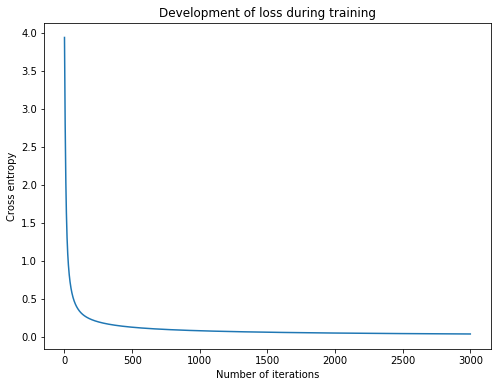

In [9]:
logistic_model_mnist = SoftmaxLogisticRegression()
w_trained, b_trained, cross_entropy_list = logistic_model_mnist.train(X_train, y_train, learning_rate=0.1, num_iters=3000, n_classes=10)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(3000), cross_entropy_list)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cross entropy")
plt.show()



In [10]:
n_test_samples, _ = X_test.shape
y_predict_mnist = logistic_model_mnist.predict(X_test)
# print(y_predict_iris)
# print(y_test_iris)
print(f"Accuracy is: {np.sum(y_predict_mnist.T==y_test)/n_test_samples}")

Accuracy is: 0.9666203059805285
